**Author:** Giulio Cordova
**Python version:**  3.x

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [ ]:
from sklearn.model_selection import cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, PrecisionRecallDisplay, RocCurveDisplay, accuracy_score

#Load Data

In [ ]:
# we use the dataset without duplicated columns

X_test_df = pd.read_csv('best_X_test_con_nomi.csv', header = 0)
y_train_df = pd.read_csv('y_train_wo_outliers_num.csv', header = None)
X_train_df = pd.read_csv('best_X_train_con_nomi.csv', header = 0)
y_test_df = pd.read_fwf('y_test.txt', header = None)

In [ ]:
X_test = X_test_df.values
y_train = y_train_df.values
X_train = X_train_df.values
y_test = y_test_df.values

Remove class 5

In [ ]:
X_train_n=np.zeros(shape=[0,23])
y_train_n=np.zeros(shape=[0,1])
for j in range(0,7274):
  if y_train[j]!=6:

    X_train_n = np.append(X_train_n, [X_train[j]], axis=0)
    y_train_n = np.append(y_train_n, [y_train[j]], axis=0)

In [ ]:
X_test_n=np.zeros(shape=[0,23])
y_test_n=np.zeros(shape=[0,1])
for j in range(0,len(y_test)):
  if y_test[j]!=6:

    X_test_n = np.append(X_test_n, [X_test[j]], axis=0)
    y_test_n = np.append(y_test_n, [y_test[j]], axis=0)

In [ ]:
X_test=X_test_n
y_test=y_test_n
X_train=X_train_n
y_train=y_train_n

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[ 0.05699237  1.77596531  0.514424    3.38658859 -1.62323246 -3.82388372
  -3.33519995  0.09286243  0.74899973 -0.51087687  0.77360798 -0.65780468
  -0.56740453  0.31328356 -0.32860229 -0.63428073  1.69430237 -2.95629069
   0.03045351 -0.44087834 -8.9369512  10.69644585 -3.40815776]]
Intercept: 
 [4.42707507]


In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.530
MSE: 0.988
MAE: 0.745


Try to divide the dataset according to class and predict class. We expect all coefficients to be zero and an intercept at the height of the class.

In [ ]:
X_train_class=[]
X_test_class=[]
y_train_class=[]
y_test_class=[]

for i in range(1,6):
  X_dummy=[]
  y_dummy=[]
  for j in range(0,len(y_train)):
    if y_train[j]==i:
      X_dummy.append(X_train[j])
      y_dummy.append(y_train[j])
  X_train_class.append(X_dummy)
  y_train_class.append(y_dummy)

for i in range(1,6):
  X_dummy=[]
  y_dummy=[]
  for j in range(0,len(y_test)):
    if y_train[j]==i:
      X_dummy.append(X_test[j])
      y_dummy.append(y_test[j])
  X_test_class.append(X_dummy)
  y_test_class.append(y_dummy)

In [ ]:
for i in range(0,5):
  reg = LinearRegression()
  reg.fit(X_train_class[i], y_train_class[i])
  print('Multi regression for class ', i)
  print('Coefficients: \n', reg.coef_)
  print('Intercept: \n', reg.intercept_)
  y_pred = reg.predict(X_test_class[i])
  print('R2: %.3f' % r2_score(y_test_class[i], y_pred))
  print('MSE: %.3f' % mean_squared_error(y_test_class[i], y_pred))
  print('MAE: %.3f' % mean_absolute_error(y_test_class[i], y_pred))

Multi regression for class  0
Coefficients: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Intercept: 
 [1.]
R2: -2.282
MSE: 7.024
MAE: 2.210
Multi regression for class  1
Coefficients: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Intercept: 
 [2.]
R2: -0.299
MSE: 2.844
MAE: 1.393
Multi regression for class  2
Coefficients: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Intercept: 
 [3.]
R2: -0.001
MSE: 2.050
MAE: 1.258
Multi regression for class  3
Coefficients: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Intercept: 
 [4.]
R2: -0.343
MSE: 2.658
MAE: 1.329
Multi regression for class  4
Coefficients: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Intercept: 
 [5.]
R2: -2.108
MSE: 6.352
MAE: 2.076


Perform a linear regression over the 23 variables. Keep one as target and let the others be the support.

In [ ]:
col_names=list(X_train_df.columns)

In [ ]:
coefficients=np.zeros(shape=(0,22))

coeff_r2=[]

for element in col_names:
  dummy_x_tr=X_train_df.loc[:, X_train_df.columns != element]
  dummy_y_tr=X_train_df.loc[:, X_train_df.columns == element]
  dummy_x_te=X_test_df.loc[:, X_test_df.columns != element]
  dummy_y_te=X_test_df.loc[:, X_test_df.columns == element]
  X_test_dummy = dummy_x_te.values
  y_train_dummy = dummy_y_tr.values
  X_train_dummy = dummy_x_tr.values
  y_test_dummy = dummy_y_te.values
  reg = LinearRegression()
  reg.fit(X_train_dummy, y_train_dummy)
  print('Multi regression for class ', element)
  print('Coefficients: \n', reg.coef_)
  print('Intercept: \n', reg.intercept_)

  dum_coef=reg.coef_
  #np.insert(dum_coef,0,1,axis=1)
  
  coefficients = np.append(coefficients, dum_coef, axis=0)
  #print(dum_coef)
  #dum_coef.insert(col_names.index(element),1)
  #print(dum_coef)
  #coefficients.append(dum_coef)

  y_pred = reg.predict(X_test_dummy)
  print('R2: %.3f' % r2_score(y_test_dummy, y_pred))
  print('MSE: %.3f' % mean_squared_error(y_test_dummy, y_pred))
  print('MAE: %.3f' % mean_absolute_error(y_test_dummy, y_pred))

  coeff_r2.append(r2_score(y_test_dummy, y_pred))

Multi regression for class  tBodyAcc-correlation()-X,Y
Coefficients: 
 [[-0.41453973 -0.74880309  0.55488976 -0.0119268  -0.30547722 -0.6540953
  -0.46422595 -0.01905732  0.08157564  0.12849118 -0.22825771  0.05095703
   0.0110413   0.02766858 -0.14109356 -0.0939996   0.2271097  -0.08161057
   0.04743496 -0.39974533 -0.27815727 -1.3622562 ]]
Intercept: 
 [-0.41219303]
R2: -0.101
MSE: 0.130
MAE: 0.271
Multi regression for class  tGravityAcc-mean()-X
Coefficients: 
 [[-8.27815229e-04  6.08580068e-02  2.08264719e-01  1.01655957e+00
  -5.53130060e-02 -2.06961649e-01  3.52666964e-04 -1.79605509e-02
  -2.39035275e-03 -4.57916032e-03  3.70889085e-03 -5.54155643e-03
   2.66821563e-03 -8.17819926e-04  2.07988851e-04 -6.36429911e-03
   6.86712326e-03 -3.93452250e-04 -2.04719506e-03  1.62029104e-02
  -7.65883096e-03  5.40046960e-03]]
Intercept: 
 [-0.04210419]
R2: 0.988
MSE: 0.003
MAE: 0.029
Multi regression for class  tGravityAcc-max()-Y
Coefficients: 
 [[-0.0059011   0.24016847  0.1877583  -0.2

adding the diagonal 0 to the list of coefficients (b)

In [ ]:
b = np.zeros((coefficients.shape[0], coefficients.shape[1]+1), dtype=coefficients.dtype)

i = np.arange(b.shape[0])

j = np.arange(b.shape[1])

b[np.not_equal.outer(i, j)] = coefficients.ravel()

In [ ]:
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn import preprocessing

In [ ]:
matrix=normalize(b, axis=1, norm='l2')

Heatmap of coefficients for the linear regression task. Everything is normalized with the l2 norm. This plot indicates how the variables are multicorreleted with each other 

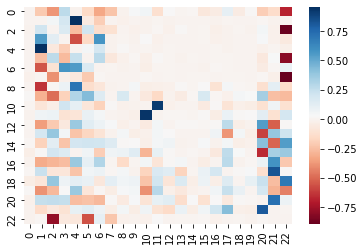

In [ ]:
ax = sns.heatmap(matrix,cmap='RdBu')
ax.figure.savefig('lin_heatmap.pdf', bbox_inches = 'tight')


Now I want to see for which variable we have the best regression. I look at the values of r2 and indentify the best with a bar chart.

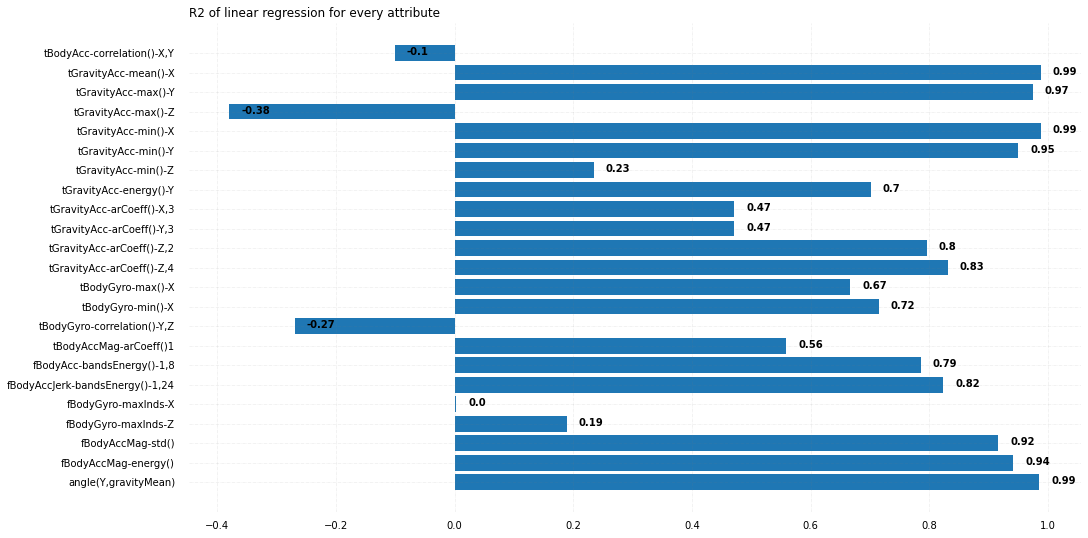

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(col_names, coeff_r2)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
 
# Add Plot Title
ax.set_title('R2 of linear regression for every attribute',
             loc ='left', )
 
# Show Plot
plt.show()

ax.figure.savefig('r2_lin.pdf', bbox_inches = 'tight')

# Ridge

perform a linear regression over the target classes with the ridge penalty

In [ ]:
reg = Ridge()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[ 0.08267493  0.92352426  1.42551214  2.57298009 -0.82988251 -2.56637842
  -2.50187552  0.07547094  0.76115559 -0.57682219  0.85075819 -0.7135458
  -0.71041968  0.42782444 -0.38169804 -0.53775349  1.67043601 -2.68929659
   0.01270389 -0.47091993 -8.07623386  9.71387046 -0.46178656]]
Intercept: 
 [3.97230322]


In [ ]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.645
MSE: 0.747
MAE: 0.673


do the same as you did for the linear regression, except that this time you have the ridge penalty.

In [ ]:
coefficients=np.zeros(shape=(0,22))

coeff_r2=[]

for element in col_names:
  dummy_x_tr=X_train_df.loc[:, X_train_df.columns != element]
  dummy_y_tr=X_train_df.loc[:, X_train_df.columns == element]
  dummy_x_te=X_test_df.loc[:, X_test_df.columns != element]
  dummy_y_te=X_test_df.loc[:, X_test_df.columns == element]
  X_test_dummy = dummy_x_te.values
  y_train_dummy = dummy_y_tr.values
  X_train_dummy = dummy_x_tr.values
  y_test_dummy = dummy_y_te.values
  reg = Ridge()
  reg.fit(X_train_dummy, y_train_dummy)

  dum_coef=reg.coef_

  
  coefficients = np.append(coefficients, dum_coef, axis=0)

  y_pred = reg.predict(X_test_dummy)

  coeff_r2.append(r2_score(y_test_dummy, y_pred))

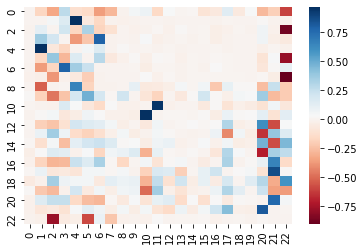

In [ ]:
b = np.zeros((coefficients.shape[0], coefficients.shape[1]+1), dtype=coefficients.dtype)

i = np.arange(b.shape[0])

j = np.arange(b.shape[1])

b[np.not_equal.outer(i, j)] = coefficients.ravel()

matrix=normalize(b, axis=1, norm='l2')

ax = sns.heatmap(matrix,cmap='RdBu')
ax.figure.savefig('ridge_heatmap.pdf', bbox_inches = 'tight')


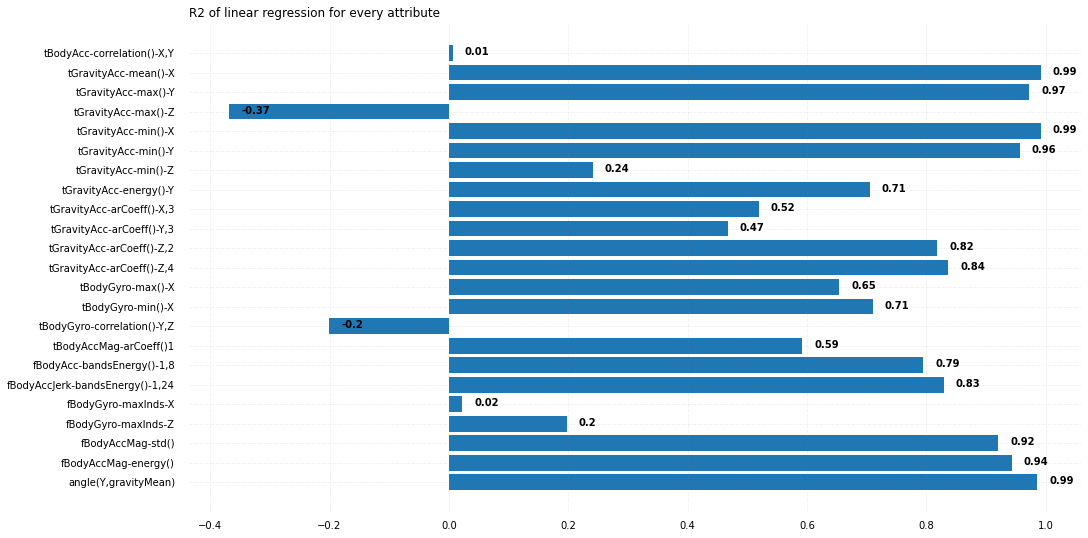

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(col_names, coeff_r2)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
 
# Add Plot Title
ax.set_title('R2 of linear regression for every attribute',
             loc ='left', )
 
# Show Plot
plt.show()

ax.figure.savefig('r2_lin.pdf', bbox_inches = 'tight')

# Lasso

Select the best, worse and middle performing variables according to lasso regularization, then do a grid search to identify the best paramenters for alpha (tuning of hyperparameter)

In [ ]:
 variabili=['tGravityAcc-mean()-X','tBodyAcc-correlation()-X,Y','fBodyGyro-maxInds-X']


r2_to_plot=[]
for element in variabili:
  dummy_x_tr=X_train_df.loc[:, X_train_df.columns != element]
  dummy_y_tr=X_train_df[[element]]
  dummy_x_te=X_test_df.loc[:, X_test_df.columns != element]
  dummy_y_te=X_test_df[[element]]
  X_test_dummy = dummy_x_te.values
  y_train_dummy = dummy_y_tr.values
  X_train_dummy = dummy_x_tr.values
  y_test_dummy = dummy_y_te.values

  alpha=[1,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]
  r2_scores=[]
  for al in alpha:
    reg = Lasso(alpha=al)
    reg.fit(X_train_dummy, y_train_dummy)
    y_pred = reg.predict(X_test_dummy)
    r2_scores.append(r2_score(y_test_dummy, y_pred))
    #print('Multi regression for class ', element)
    #print(al, 'R2: %.3f' % r2_score(y_test_dummy, y_pred))
    #print(r2_scores)
  r2_to_plot.append(r2_scores)
  #print('Multi regression for class ', 'tGravityAcc-mean()-X')
  #print('Coefficients: \n', reg.coef_)
  #print('Intercept: \n', reg.intercept_)
  #print('R2: %.3f' % r2_score(y_test_dummy, y_pred))
  #print('MSE: %.3f' % mean_squared_error(y_test_dummy, y_pred))
  #print('MAE: %.3f' % mean_absolute_error(y_test_dummy, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.494e-01, tolerance: 1.928e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.429e-01, tolerance: 1.928e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Multi regression for class  tGravityAcc-mean()-X
Coefficients: 
 [-8.62341475e-04  6.06588274e-02  2.09359227e-01  1.01640199e+00
 -5.71768868e-02 -2.08041247e-01 -1.01828571e-04 -1.79278282e-02
 -2.33550112e-03 -4.65839603e-03  3.75289280e-03 -5.43617537e-03
  2.57474213e-03 -7.77791804e-04  1.89327885e-04 -6.19769134e-03
  6.91150226e-03 -3.74731123e-04 -2.04400669e-03  1.57301105e-02
 -7.50216029e-03  2.53640242e-03]
Intercept: 
 [-0.04194995]
R2: 0.987


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.366e-01, tolerance: 9.462e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.455e+00, tolerance: 9.462e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Multi regression for class  tBodyAcc-correlation()-X,Y
Coefficients: 
 [-0.27333558 -0.76484089  0.5210564  -0.15557553 -0.28947384 -0.62036648
 -0.46400576 -0.01657204  0.08154963  0.12975859 -0.22904518  0.05128527
  0.01109471  0.02765798 -0.14103529 -0.09386812  0.22591455 -0.08153407
  0.04767753 -0.39973346 -0.27785996 -1.36164884]
Intercept: 
 [-0.40706892]
R2: -0.077


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.698e+01, tolerance: 2.873e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+02, tolerance: 2.873e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Multi regression for class  fBodyGyro-maxInds-X
Coefficients: 
 [-0.0307347  -0.14376478  0.35691247  0.08944356  0.18350982  0.08172298
 -0.08056189  0.11003795  0.0586798   0.07119332 -0.20992285  0.18941211
 -0.07602209  0.14943356 -0.02362104  0.07629148 -0.0258766   0.13706548
  0.09847599  0.21206717 -0.23101827  0.62241371]
Intercept: 
 [-0.8230442]
R2: -0.005


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+02, tolerance: 2.873e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


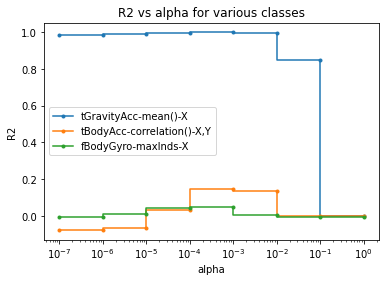

In [ ]:
fig, ax =plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("R2")
ax.set_title("R2 vs alpha for various classes")
ax.plot(alpha,r2_to_plot[0], marker ='.',label=variabili[0],drawstyle='steps-post')
ax.plot(alpha,r2_to_plot[1], marker ='.',label=variabili[1],drawstyle='steps-post')
ax.plot(alpha,r2_to_plot[2], marker ='.',label=variabili[2],drawstyle='steps-post')
ax.set_xscale('log')
ax.legend()
ax.figure.savefig('alpha_tuning.pdf', bbox_inches = 'tight')

plt.show()

In [ ]:
for element in variabili:
  dummy_x_tr=X_train_df.loc[:, X_train_df.columns != element]
  dummy_y_tr=X_train_df[[element]]
  dummy_x_te=X_test_df.loc[:, X_test_df.columns != element]
  dummy_y_te=X_test_df[[element]]
  X_test_dummy = dummy_x_te.values
  y_train_dummy = dummy_y_tr.values
  X_train_dummy = dummy_x_tr.values
  y_test_dummy = dummy_y_te.values

  reg = Lasso(alpha=0.001)
  reg.fit(X_train_dummy, y_train_dummy)
  y_pred = reg.predict(X_test_dummy)
  print('Multi regression for class ', element)
  print('Coefficients: \n', reg.coef_)
  print('Intercept: \n', reg.intercept_)
  print('R2: %.3f' % r2_score(y_test_dummy, y_pred))
  #print('MSE: %.3f' % mean_squared_error(y_test_dummy, y_pred))
  #print('MAE: %.3f' % mean_absolute_error(y_test_dummy, y_pred))

Multi regression for class  tGravityAcc-mean()-X
Coefficients: 
 [-0.         -0.         -0.          1.00778786 -0.         -0.
 -0.         -0.         -0.0065225   0.0066176   0.          0.
 -0.         -0.         -0.00461105  0.          0.         -0.
 -0.          0.01503285  0.          0.        ]
Intercept: 
 [-0.01601928]
R2: 0.999
Multi regression for class  tBodyAcc-correlation()-X,Y
Coefficients: 
 [-0.1823691  -0.03141154 -0.         -0.16417501 -0.01409884 -0.10418155
 -0.25603197  0.          0.04974557 -0.         -0.06049445  0.00581179
 -0.          0.01510592 -0.08037268 -0.06238353  0.         -0.06585384
  0.02953316 -0.28721497 -0.18579069  0.        ]
Intercept: 
 [-0.44853735]
R2: 0.144
Multi regression for class  fBodyGyro-maxInds-X
Coefficients: 
 [-0.03220685  0.          0.          0.         -0.          0.
  0.          0.          0.02387379  0.06738088 -0.02484431 -0.
 -0.          0.04938765 -0.0078096   0.06217337 -0.          0.
  0.0946508   0. 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.366e-01, tolerance: 9.462e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
for element in variabili:
  dummy_x_tr=X_train_df.loc[:, X_train_df.columns != element]
  dummy_y_tr=X_train_df[[element]]
  dummy_x_te=X_test_df.loc[:, X_test_df.columns != element]
  dummy_y_te=X_test_df[[element]]
  X_test_dummy = dummy_x_te.values
  y_train_dummy = dummy_y_tr.values
  X_train_dummy = dummy_x_tr.values
  y_test_dummy = dummy_y_te.values

  reg = Ridge()
  reg.fit(X_train_dummy, y_train_dummy)
  y_pred = reg.predict(X_test_dummy)
  print('Multi regression for class ', element)
  print('Coefficients: \n', reg.coef_)
  print('Intercept: \n', reg.intercept_)
  print('R2: %.3f' % r2_score(y_test_dummy, y_pred))
  #print('MSE: %.3f' % mean_squared_error(y_test_dummy, y_pred))
  #print('MAE: %.3f' % mean_absolute_error(y_test_dummy, y_pred))

Multi regression for class  tGravityAcc-mean()-X
Coefficients: 
 [[-1.22875919e-03  5.61575404e-02  1.71169721e-01  1.01320741e+00
  -6.22900420e-02 -1.71056383e-01 -3.58519783e-03 -1.69580893e-02
  -3.07754077e-03 -8.88212098e-04  2.36815178e-03 -6.02560140e-03
   2.83138135e-03 -1.05867707e-03  7.11582851e-04 -7.52145867e-03
   6.17079689e-03 -1.20076960e-04 -2.21285243e-03  2.16565739e-02
  -9.85068753e-03 -1.13105448e-02]]
Intercept: 
 [-0.04157336]
R2: 0.991
Multi regression for class  tBodyAcc-correlation()-X,Y
Coefficients: 
 [[-0.24336124 -0.48119165  0.40417198 -0.16898707 -0.21329361 -0.51681484
  -0.40217515 -0.01311441  0.08257203  0.12806089 -0.22686815  0.0502987
   0.00842272  0.02491237 -0.14199411 -0.09381931  0.2141388  -0.08466269
   0.04941651 -0.39475579 -0.27543261 -0.87773884]]
Intercept: 
 [-0.40201058]
R2: 0.006
Multi regression for class  fBodyGyro-maxInds-X
Coefficients: 
 [[-0.03180647 -0.00893445  0.23669042  0.05265966  0.03918218  0.03849499
  -0.0383894 

# Logistic Regression

Faccio due classi: dynamic (1,2,3 aka walking, upstairs and downstairs) e static (4,5,6 aka sitting, standing laying)

In [ ]:
y_train_bi=[]
for element in y_train:
  if element<4:
    new_el=[0]
  else:
    new_el=[1]
  y_train_bi.append(new_el)


In [ ]:
y_test_bi=[]
for element in y_test:
  if element<4:
    new_el=[0]
  else:
    new_el=[1]
  y_test_bi.append(new_el)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
from scipy.special import expit

Per ogni attributo mi vado a vedere la logistic regression

In [ ]:
target_names=['WALKING','WALKING UPSTAIRS','WALKING DOWNSTAIRS','SITTING','STANDING']

In [ ]:
clf = LogisticRegression(random_state=0,multi_class='multinomial')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
report=classification_report(y_test, y_pred,output_dict=True,digits=2,target_names=target_names)
report_df = pd.DataFrame(report).transpose()

print(report_df.to_latex())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.8647302904564316
F1-score 0.8636794983245066
\begin{tabular}{lrrrr}
\toprule
{} &  precision &    recall &  f1-score &     support \\
\midrule
WALKING            &   0.854167 &  0.991935 &  0.917910 &   496.00000 \\
WALKING UPSTAIRS   &   0.898851 &  0.830149 &  0.863135 &   471.00000 \\
WALKING DOWNSTAIRS &   0.973822 &  0.885714 &  0.927681 &   420.00000 \\
SITTING            &   0.855107 &  0.733198 &  0.789474 &   491.00000 \\
STANDING           &   0.786913 &  0.881579 &  0.831560 &   532.00000 \\
accuracy           &   0.864730 &  0.864730 &  0.864730 &     0.86473 \\
macro avg          &   0.873772 &  0.864515 &  0.865952 &  2410.00000 \\
weighted avg       &   0.869098 &  0.864730 &  0.863679 &  2410.00000 \\
\bottomrule
\end{tabular}



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


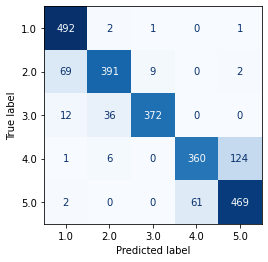

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,
                      X_test,
                      y_test,
                      cmap='Blues',
                      values_format='d',
                      colorbar=False
                      )
plt.savefig('confusion_matrix.pdf',bbox_inches = 'tight')

In [ ]:
def plot_multiclass_roc(clf, X, y, clf_name, ax = None):
    if not isinstance(y, type(np.array([]))):
        y = y.values
    if ax is None:
        fig = plt.figure(figsize = (6, 4))
        ax = fig.add_subplot()
    y_pred_proba = clf.predict_proba(X)   
    for i, label in enumerate(np.unique(y)):
        class_i_arr = (y == label).astype(int)
        class_i_prob_arr = y_pred_proba[:, i]
        RocCurveDisplay.from_predictions(class_i_arr, class_i_prob_arr,
                        name = clf_name + f' of class {label}', ax = ax)
    random = ax.plot(np.linspace(0,1,100), np.linspace(0,1,100), 'k--', 
                 label = 'Random Classifier')
    ax.set_ylabel('True Positive Rate', fontsize = 14)
    ax.set_xlabel('False Positive Rate', fontsize = 14)

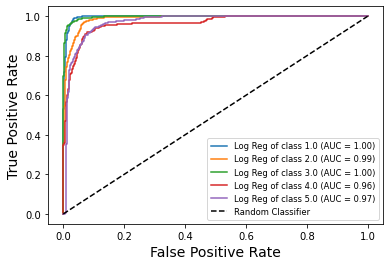

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(clf, X_test, y_test, 
                    'Log Reg', ax = ax)
ax.legend(fontsize = 'small')
plt.savefig('log_multiclass_roc.pdf', bbox_inches = 'tight')
plt.show()

poi vado a vedere come contribuiscono singolarmente le variabili in sta multi

ITERATION %d 0
Accuracy 0.656939260264676
F1-score 0.653336207249566
              precision    recall  f1-score   support

           0       0.66      0.55      0.60      1387
           1       0.65      0.75      0.70      1560

    accuracy                           0.66      2947
   macro avg       0.66      0.65      0.65      2947
weighted avg       0.66      0.66      0.65      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


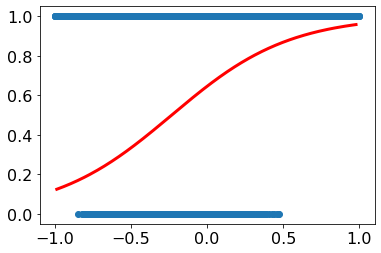

ITERATION %d 1
Accuracy 0.6345436036647438
F1-score 0.6162685402839425
              precision    recall  f1-score   support

           0       0.57      0.88      0.69      1387
           1       0.79      0.42      0.55      1560

    accuracy                           0.63      2947
   macro avg       0.68      0.65      0.62      2947
weighted avg       0.69      0.63      0.62      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


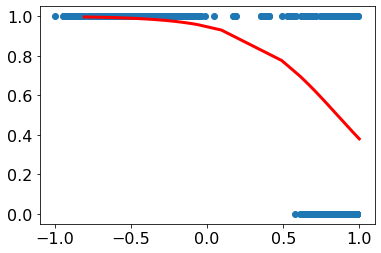

ITERATION %d 2
Accuracy 0.7051238547675602
F1-score 0.7052277560237552
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      1387
           1       0.75      0.67      0.71      1560

    accuracy                           0.71      2947
   macro avg       0.71      0.71      0.71      2947
weighted avg       0.71      0.71      0.71      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


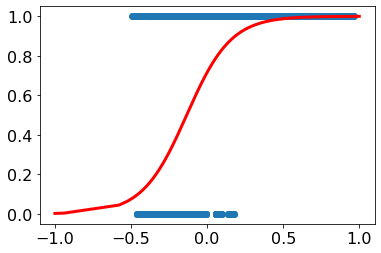

ITERATION %d 3
Accuracy 0.5212080081438751
F1-score 0.36857250196156244
              precision    recall  f1-score   support

           0       0.23      0.01      0.01      1387
           1       0.53      0.98      0.68      1560

    accuracy                           0.52      2947
   macro avg       0.38      0.49      0.35      2947
weighted avg       0.39      0.52      0.37      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


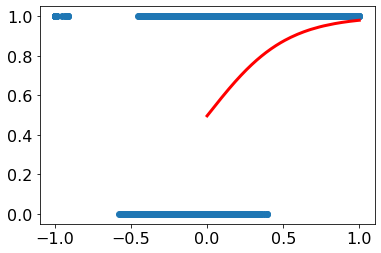

ITERATION %d 4
Accuracy 0.6260604004071938
F1-score 0.6071780125691041
              precision    recall  f1-score   support

           0       0.57      0.87      0.69      1387
           1       0.78      0.41      0.54      1560

    accuracy                           0.63      2947
   macro avg       0.67      0.64      0.61      2947
weighted avg       0.68      0.63      0.61      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


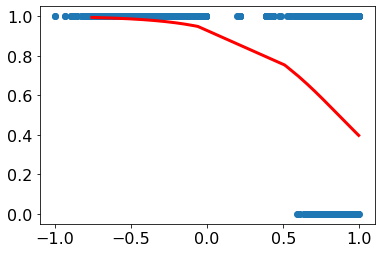

ITERATION %d 5
Accuracy 0.7010519172039362
F1-score 0.7011834881474542
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1387
           1       0.74      0.67      0.70      1560

    accuracy                           0.70      2947
   macro avg       0.70      0.70      0.70      2947
weighted avg       0.70      0.70      0.70      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


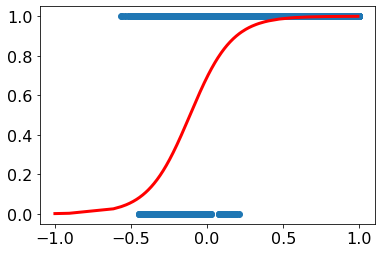

ITERATION %d 6
Accuracy 0.6684764166949441
F1-score 0.6628233466774922
              precision    recall  f1-score   support

           0       0.69      0.54      0.60      1387
           1       0.66      0.78      0.71      1560

    accuracy                           0.67      2947
   macro avg       0.67      0.66      0.66      2947
weighted avg       0.67      0.67      0.66      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


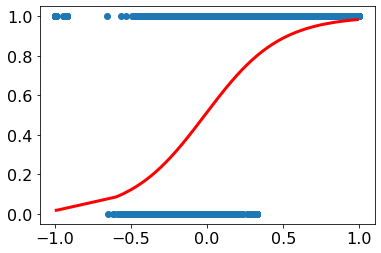

ITERATION %d 7
Accuracy 0.5693926026467594
F1-score 0.5676873330219961
              precision    recall  f1-score   support

           0       0.54      0.65      0.59      1387
           1       0.61      0.50      0.55      1560

    accuracy                           0.57      2947
   macro avg       0.57      0.57      0.57      2947
weighted avg       0.58      0.57      0.57      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


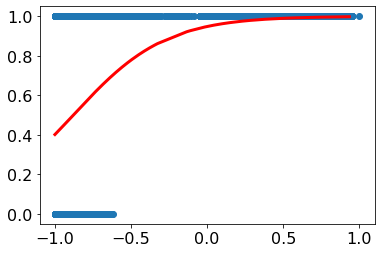

ITERATION %d 8
Accuracy 0.6725483542585681
F1-score 0.6662010446658169


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.70      0.53      0.61      1387
           1       0.66      0.80      0.72      1560

    accuracy                           0.67      2947
   macro avg       0.68      0.66      0.66      2947
weighted avg       0.68      0.67      0.67      2947



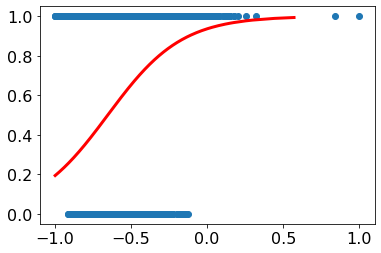

ITERATION %d 9
Accuracy 0.5239226331862912
F1-score 0.3651715842238881
              precision    recall  f1-score   support

           0       0.10      0.00      0.00      1387
           1       0.53      0.99      0.69      1560

    accuracy                           0.52      2947
   macro avg       0.31      0.49      0.35      2947
weighted avg       0.33      0.52      0.37      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


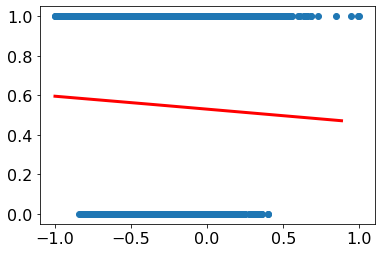

ITERATION %d 10
Accuracy 0.5293518832711231
F1-score 0.36644727663765353
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1387
           1       0.53      1.00      0.69      1560

    accuracy                           0.53      2947
   macro avg       0.26      0.50      0.35      2947
weighted avg       0.28      0.53      0.37      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

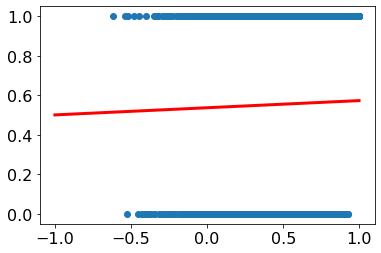

ITERATION %d 11
Accuracy 0.5110281642348151
F1-score 0.44371267276254667
              precision    recall  f1-score   support

           0       0.44      0.14      0.22      1387
           1       0.52      0.84      0.64      1560

    accuracy                           0.51      2947
   macro avg       0.48      0.49      0.43      2947
weighted avg       0.48      0.51      0.44      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


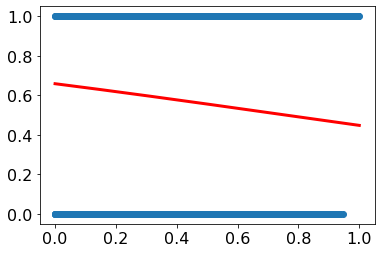

ITERATION %d 12
Accuracy 0.9375636240244316
F1-score 0.9373869238092751
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1387
           1       0.92      0.97      0.94      1560

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


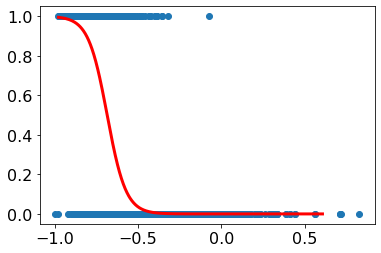

ITERATION %d 13
Accuracy 0.9558873430607397
F1-score 0.9558632203864385
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1387
           1       0.95      0.97      0.96      1560

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


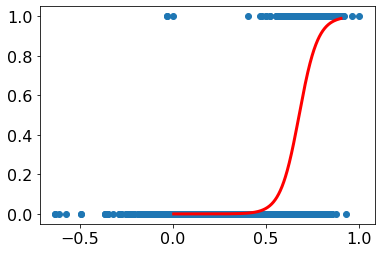

ITERATION %d 14
Accuracy 0.6250424160162877
F1-score 0.6246165491033769
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1387
           1       0.64      0.66      0.65      1560

    accuracy                           0.63      2947
   macro avg       0.62      0.62      0.62      2947
weighted avg       0.62      0.63      0.62      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


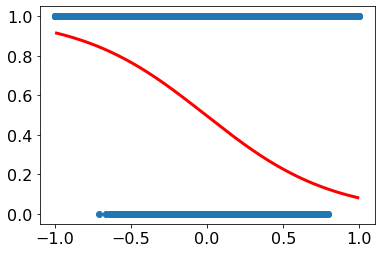

ITERATION %d 15
Accuracy 0.6888361045130641
F1-score 0.6855680534597943
              precision    recall  f1-score   support

           0       0.70      0.59      0.64      1387
           1       0.68      0.78      0.73      1560

    accuracy                           0.69      2947
   macro avg       0.69      0.68      0.68      2947
weighted avg       0.69      0.69      0.69      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


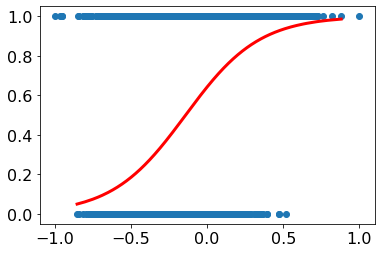

ITERATION %d 16
Accuracy 0.9837122497455039
F1-score 0.9836971350662778
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1387
           1       0.97      1.00      0.98      1560

    accuracy                           0.98      2947
   macro avg       0.98      0.98      0.98      2947
weighted avg       0.98      0.98      0.98      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


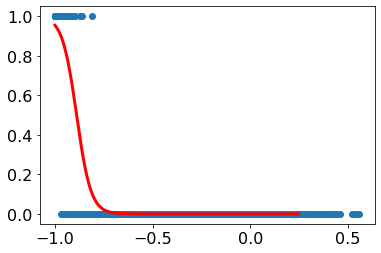

ITERATION %d 17
Accuracy 0.991856124872752
F1-score 0.991851671455958
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1387
           1       0.98      1.00      0.99      1560

    accuracy                           0.99      2947
   macro avg       0.99      0.99      0.99      2947
weighted avg       0.99      0.99      0.99      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


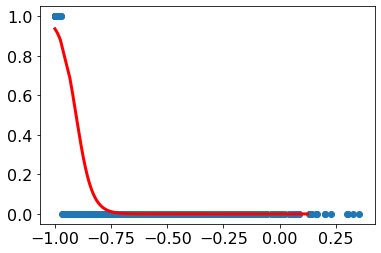

ITERATION %d 18
Accuracy 0.5293518832711231
F1-score 0.36644727663765353
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1387
           1       0.53      1.00      0.69      1560

    accuracy                           0.53      2947
   macro avg       0.26      0.50      0.35      2947
weighted avg       0.28      0.53      0.37      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

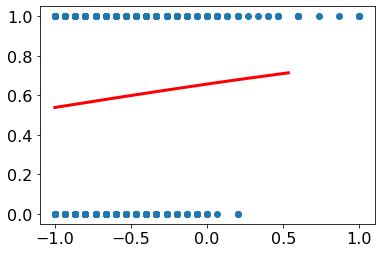

ITERATION %d 19
Accuracy 0.6745843230403801
F1-score 0.664980770966969
              precision    recall  f1-score   support

           0       0.72      0.50      0.59      1387
           1       0.65      0.83      0.73      1560

    accuracy                           0.67      2947
   macro avg       0.69      0.67      0.66      2947
weighted avg       0.68      0.67      0.66      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


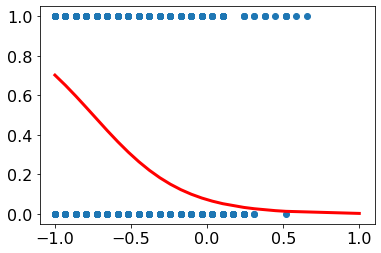

ITERATION %d 20
Accuracy 0.9755683746182559
F1-score 0.9755683746182559
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1387
           1       0.98      0.98      0.98      1560

    accuracy                           0.98      2947
   macro avg       0.98      0.98      0.98      2947
weighted avg       0.98      0.98      0.98      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


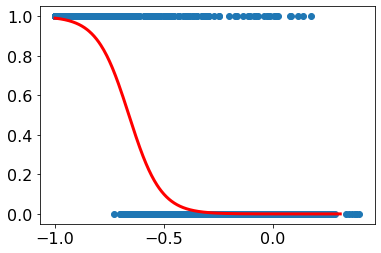

ITERATION %d 21
Accuracy 0.9674244994910078
F1-score 0.9673923743458206
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1387
           1       0.96      0.98      0.97      1560

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


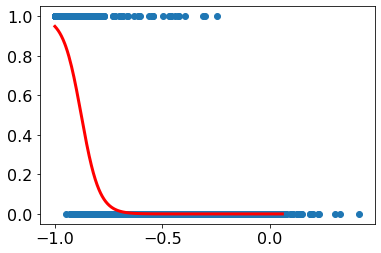

ITERATION %d 22
Accuracy 0.7074991516796743
F1-score 0.7075692066001439
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1387
           1       0.75      0.67      0.71      1560

    accuracy                           0.71      2947
   macro avg       0.71      0.71      0.71      2947
weighted avg       0.71      0.71      0.71      2947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


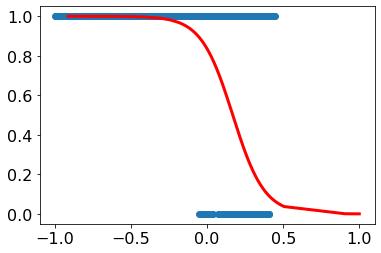

In [ ]:
score_array=[]

for i in range(0,23):
  print("ITERATION %d",i)
  clf = LogisticRegression(random_state=0)
  clf.fit(X_train.T[i].reshape(-1,1), y_train_bi)
  y_pred = clf.predict(X_test.T[i].reshape(-1,1))

  print('Accuracy %s' % accuracy_score(y_test_bi, y_pred))
  print('F1-score %s' % f1_score(y_test_bi, y_pred, average='weighted'))
  print(classification_report(y_test_bi, y_pred))

  score_array.append([i,accuracy_score(y_test_bi, y_pred),f1_score(y_test_bi, y_pred, average='weighted')])

  loss = expit(sorted(X_test.T[i].reshape(-1,1)) * clf.coef_ + clf.intercept_).ravel()
  plt.plot(sorted(X_test.T[i].reshape(-1,1)), loss, color='red', linewidth=3)
  plt.scatter(X_train.T[i].reshape(-1,1), y_train_bi)
  #plt.xlabel(selected_columns[0], fontsize=16)
  #plt.ylabel('Occupancy', fontsize=16)
  plt.tick_params(axis='both', which='major', labelsize=16)
  plt.show()


Stampami: numero variabile, accuracy e f1 score

In [ ]:
np.round(score_array,2)

array([[ 0.  ,  0.66,  0.65],
       [ 1.  ,  0.63,  0.62],
       [ 2.  ,  0.71,  0.71],
       [ 3.  ,  0.52,  0.37],
       [ 4.  ,  0.63,  0.61],
       [ 5.  ,  0.7 ,  0.7 ],
       [ 6.  ,  0.67,  0.66],
       [ 7.  ,  0.57,  0.57],
       [ 8.  ,  0.67,  0.67],
       [ 9.  ,  0.52,  0.37],
       [10.  ,  0.53,  0.37],
       [11.  ,  0.51,  0.44],
       [12.  ,  0.94,  0.94],
       [13.  ,  0.96,  0.96],
       [14.  ,  0.63,  0.62],
       [15.  ,  0.69,  0.69],
       [16.  ,  0.98,  0.98],
       [17.  ,  0.99,  0.99],
       [18.  ,  0.53,  0.37],
       [19.  ,  0.67,  0.66],
       [20.  ,  0.98,  0.98],
       [21.  ,  0.97,  0.97],
       [22.  ,  0.71,  0.71]])

Altro approccio: guarda le variabili a due a due (tipo classi 1 e 2, poi 1 e 3, etc...).

In [ ]:
from numpy.lib.function_base import kaiser
y_train_couple=[]

X_train_couple=[]
list_names=[]

for j in range(1,5):
  for k in range(j+1,6):
    y_dummy=[]
    X_dummy=[]
    list_names.append([j,k])
    for i in range(0,len(y_train)):
      clas=y_train[i][0]
      if clas==j or clas==k:
        y_dummy.append(clas)
        X_dummy.append((X_train[i]))

    y_train_couple.append(y_dummy)
    X_train_couple.append(X_dummy)

In [ ]:
list_names

[[1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [2, 3],
 [2, 4],
 [2, 5],
 [3, 4],
 [3, 5],
 [4, 5]]

In [ ]:
y_test_couple=[]

X_test_couple=[]


for j in range(1,5):
  for k in range(j+1,6):
    y_dummy=[]
    X_dummy=[]
    for i in range(0,len(y_test)):
      clas=y_test[i][0]
      if clas==j or clas==k:
        y_dummy.append(clas)
        X_dummy.append(list(X_test[i]))

    y_test_couple.append(y_dummy)
    X_test_couple.append(X_dummy)

In [ ]:
len(X_train_couple)

10

In [ ]:
names_couple=['1-2','1-3','1-4','1-5','2-3','2-4','2-5','3-4','3-5','4-5']

e qua riperformo la multi che ho fatt osopra. tanto ho capito che quell'altra è inutile.

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

Classification for variables  1-2
Accuracy 0.9317476732161324
F1-score 0.9313725246312129
              precision    recall  f1-score   support

         1.0       0.89      0.99      0.94       496
         2.0       0.99      0.87      0.93       471

    accuracy                           0.93       967
   macro avg       0.94      0.93      0.93       967
weighted avg       0.94      0.93      0.93       967

Classification for variables  1-3
Accuracy 0.9748908296943232
F1-score 0.9748362268512948
              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98       496
         3.0       1.00      0.95      0.97       420

    accuracy                           0.97       916
   macro avg       0.98      0.97      0.97       916
weighted avg       0.98      0.97      0.97       916

Classification for variables  1-4
Accuracy 0.9959473150962512
F1-score 0.9959471653185551
              precision    recall  f1-score   support

         1.0       0.

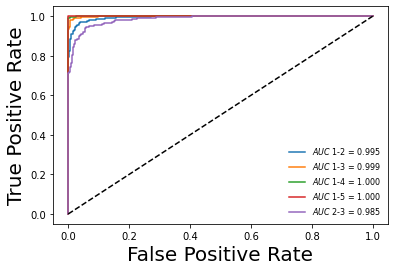

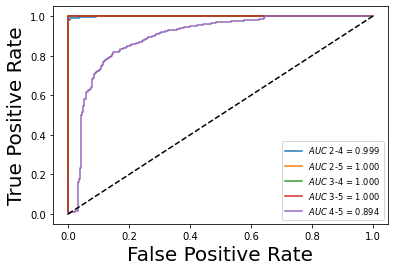

In [ ]:
fig1 = plt.figure(figsize = (6, 4))
fig2 = plt.figure(figsize = (6, 4))


ax1 = fig1.add_subplot()

ax2 = fig2.add_subplot()

for (x_tr,y_tr,x_te,y_te,ele,i) in zip(X_train_couple,y_train_couple,X_test_couple,y_test_couple,list_names,names_couple):
  clf = LogisticRegression(random_state=0,multi_class='auto')
  clf.fit(x_tr, y_tr)
  y_pred = clf.predict(x_te)
  print('Classification for variables ',i)
  print('Accuracy %s' % accuracy_score(y_te, y_pred))
  print('F1-score %s' % f1_score(y_te, y_pred, average='weighted'))
  print(classification_report(y_te, y_pred))

  y_score = clf.predict_proba(x_te)
  y_te_dummy=[]
  for ite in y_te: 
    if(ite==ele[0]):
      ite=0
    if(ite==ele[1]):
      ite=1
    y_te_dummy.append(ite)
  fpr_el, tpr_el, th = roc_curve(y_te_dummy, y_score[:,1])

  roc_auc_el = auc(fpr_el, tpr_el)

  if(X_train_couple.index(x_tr)<5):
    ax1.plot(fpr_el, tpr_el, label='$AUC$ %s = %.3f' % (i,roc_auc_el))
  if(X_train_couple.index(x_tr)>4):
    ax2.plot(fpr_el, tpr_el, label='$AUC$ %s = %.3f' % (i,roc_auc_el))

ax1.legend(loc="lower right", fontsize=8, frameon=False)
ax1.plot([0,1], [0,1], 'k--')
ax1.set_xlabel('False Positive Rate', fontsize=20)
ax1.set_ylabel('True Positive Rate', fontsize=20)
ax1.legend(fontsize = 'small')
ax1.legend(loc="lower right", fontsize=8, frameon=False)
ax2.plot([0,1], [0,1], 'k--')
ax2.set_xlabel('False Positive Rate', fontsize=20)
ax2.set_ylabel('True Positive Rate', fontsize=20)
ax2.legend(fontsize = 'small')

ax1.figure.savefig('log_roc_1.pdf', bbox_inches = 'tight')
ax2.figure.savefig('log_roc_2.pdf', bbox_inches = 'tight')


#plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

se si analizzano a mano le cose si impazzisce. disegno la roc e via.

In [ ]:
master_score_array=[]
for (x_tr,y_tr,x_te,y_te,j,ele) in zip(X_train_couple,y_train_couple,X_test_couple,y_test_couple,range(0,15),list_names):
  score_array=[]
  for i in range(0,23):
    clf = LogisticRegression(random_state=0)
    clf.fit(np.array(x_tr).T[i].reshape(-1,1), y_tr)
    y_pred = clf.predict(np.array(x_te).T[i].reshape(-1,1))

    #print('Accuracy %s' % accuracy_score(y_test_bi, y_pred))
    #print('F1-score %s' % f1_score(y_test_bi, y_pred, average='weighted'))
    #print(classification_report(y_test_bi, y_pred))

    score_array.append([i,np.round(accuracy_score(y_te, y_pred),2),np.round(f1_score(y_te, y_pred, average='weighted'),2)])

    #loss = expit(sorted(X_test.T[i].reshape(-1,1)) * clf.coef_ + clf.intercept_).ravel()
    #plt.plot(sorted(X_test.T[i].reshape(-1,1)), loss, color='red', linewidth=3)
    #plt.scatter(X_train.T[i].reshape(-1,1), y_train_bi)
    #plt.xlabel(selected_columns[0], fontsize=16)
    #plt.ylabel('Occupancy', fontsize=16)
    #plt.tick_params(axis='both', which='major', labelsize=16)
    #plt.show()
  master_score_array.append(ele)
  master_score_array.append(score_array)

In [ ]:
master_score_array

[[1, 2],
 [[0, 0.64, 0.63],
  [1, 0.69, 0.67],
  [2, 0.59, 0.59],
  [3, 0.51, 0.35],
  [4, 0.71, 0.69],
  [5, 0.63, 0.63],
  [6, 0.65, 0.63],
  [7, 0.63, 0.63],
  [8, 0.83, 0.83],
  [9, 0.86, 0.86],
  [10, 0.81, 0.8],
  [11, 0.75, 0.75],
  [12, 0.61, 0.57],
  [13, 0.49, 0.48],
  [14, 0.51, 0.47],
  [15, 0.8, 0.8],
  [16, 0.62, 0.59],
  [17, 0.65, 0.65],
  [18, 0.76, 0.75],
  [19, 0.86, 0.85],
  [20, 0.67, 0.66],
  [21, 0.54, 0.52],
  [22, 0.61, 0.61]],
 [1, 3],
 [[0, 0.82, 0.82],
  [1, 0.55, 0.39],
  [2, 0.51, 0.5],
  [3, 0.47, 0.37],
  [4, 0.58, 0.46],
  [5, 0.52, 0.47],
  [6, 0.54, 0.38],
  [7, 0.57, 0.43],
  [8, 0.83, 0.83],
  [9, 0.66, 0.66],
  [10, 0.54, 0.38],
  [11, 0.54, 0.38],
  [12, 0.61, 0.57],
  [13, 0.7, 0.69],
  [14, 0.6, 0.59],
  [15, 0.8, 0.8],
  [16, 0.87, 0.86],
  [17, 0.62, 0.61],
  [18, 0.54, 0.38],
  [19, 0.54, 0.47],
  [20, 0.89, 0.89],
  [21, 0.86, 0.86],
  [22, 0.52, 0.48]],
 [1, 4],
 [[0, 0.52, 0.52],
  [1, 0.56, 0.55],
  [2, 0.81, 0.81],
  [3, 0.57, 0.53],
  [